In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic_data = sns.load_dataset('titanic')

In [14]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size,is_alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,2,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,2,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,1,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,2,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,1,1


In [6]:
titanic_data['age'].isnull().sum()

0

In [5]:

titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)

<ipython-input-5-c0f62613be96>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['age'].fillna(titanic_data['age'].median(), inplace=True)


In [9]:
titanic_data['embarked'].isnull().sum()

0

In [8]:
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)

<ipython-input-8-e9067a391604>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)


In [10]:
titanic_data['deck'].isnull().sum()

688

In [11]:
titanic_data.drop('deck', axis=1, inplace=True)

In [12]:
titanic_data['family_size'] = titanic_data['sibsp'] + titanic_data['parch'] + 1

In [13]:
titanic_data['is_alone'] = 1
titanic_data['is_alone'].loc[titanic_data['family_size']>1] = 0

<ipython-input-13-f91cde0f6239>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic_data['is_alone'].loc[titanic_data['family_size']>1] = 0
<ipython-input-13-f91cde0f6239>:2: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [15]:
titanic_data.drop(['alive', 'who', 'adult_male', 'embark_town', 'class', 'sibsp', 'parch', 'alone'], axis=1, inplace=True)

In [18]:
titanic_data.head()

,survived,pclass,sex,age,fare,embarked,family_size,is_alone
0,0,3,0,22.0,7.2500,S,2,0
1,1,1,1,38.0,71.2833,C,2,0
2,1,3,1,26.0,7.9250,S,1,1
3,1,1,1,35.0,53.1000,S,2,0
4,0,3,0,35.0,8.0500,S,1,1


In [17]:
titanic_data['sex'] = titanic_data['sex'].map({'male':0, 'female':1})

In [19]:
# One-hot encoding
titanic_data = pd.get_dummies(titanic_data, columns=['embarked', 'pclass'], drop_first=True)



In [20]:
titanic_data.head()

,survived,sex,age,fare,family_size,is_alone,embarked_Q,embarked_S,pclass_2,pclass_3
0,0,0,22.0,7.2500,2,0,False,True,False,True
1,1,1,38.0,71.2833,2,0,False,False,False,False
2,1,1,26.0,7.9250,1,1,False,True,False,True
3,1,1,35.0,53.1000,2,0,False,True,False,False
4,0,0,35.0,8.0500,1,1,False,True,False,True


In [22]:
titanic_data.columns

Index(['survived', 'sex', 'age', 'fare', 'family_size', 'is_alone',
       'embarked_Q', 'embarked_S', 'pclass_2', 'pclass_3'],
      dtype='object')

In [23]:
y = titanic_data['survived']

X = titanic_data.drop('survived', axis=1)

In [24]:
# Import Machine Learning Libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [30]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_pred = dt_classifier.predict(X_test)

In [33]:
accuracy= accuracy_score(y_test, y_pred)
print(f"{accuracy:.2f}")

0.80


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       157
           1       0.75      0.77      0.76       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



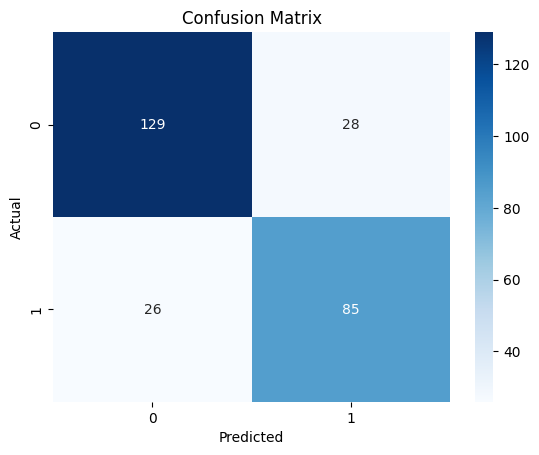

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

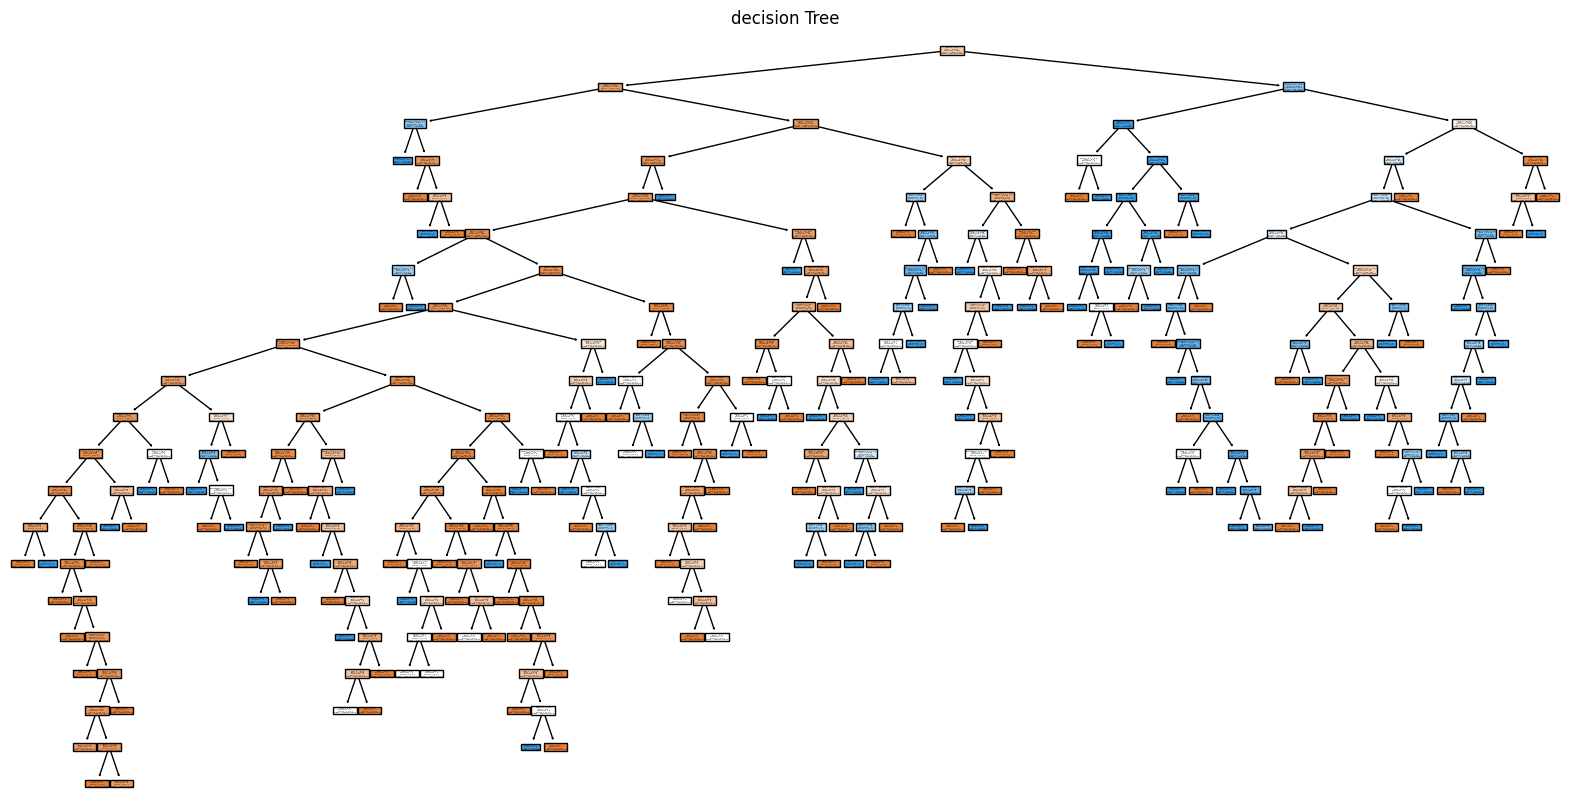

In [36]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("decision Tree")
plt.show()